In [1]:
# Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

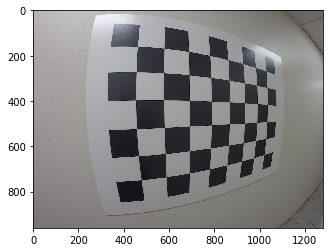

In [2]:
# Read image
img = mpimg.imread('calibration_wide/GOPR0032.jpg')
plt.imshow(img)

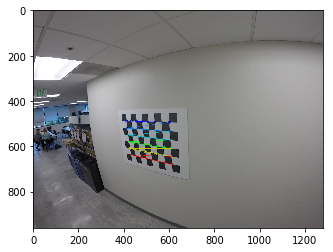

In [3]:
# Arrays to store object points and image points from all the imaages
objpoints = [] # 3D points
imgpoints = [] # 2D points

# Prepare object points
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] =  np.mgrid[0:8,0:6].T.reshape(-1,2) # x, y coordinates

# Image List
images = glob.glob('calibration_wide/*.jpg')

for fname in images:
    # Read Image
    img = mpimg.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)

    # If found, draw corners
    if ret == True:
        
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8, 6), corners, ret)
        plt.imshow(img)

In [4]:
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

In [5]:
# Read test image
img = mpimg.imread('test_image.jpg')
    
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


ret, corners = cv2.findChessboardCorners(gray, (8, 6), None)
if ret == True:
    cv2.drawChessboardCorners(img, (8, 6), corners, ret)
    
undistorted = cal_undistort(img, objpoints, imgpoints)

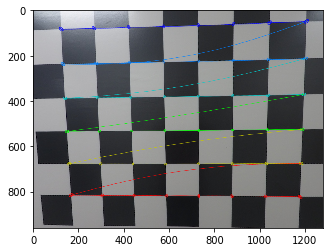

In [6]:
plt.imshow(undistorted)

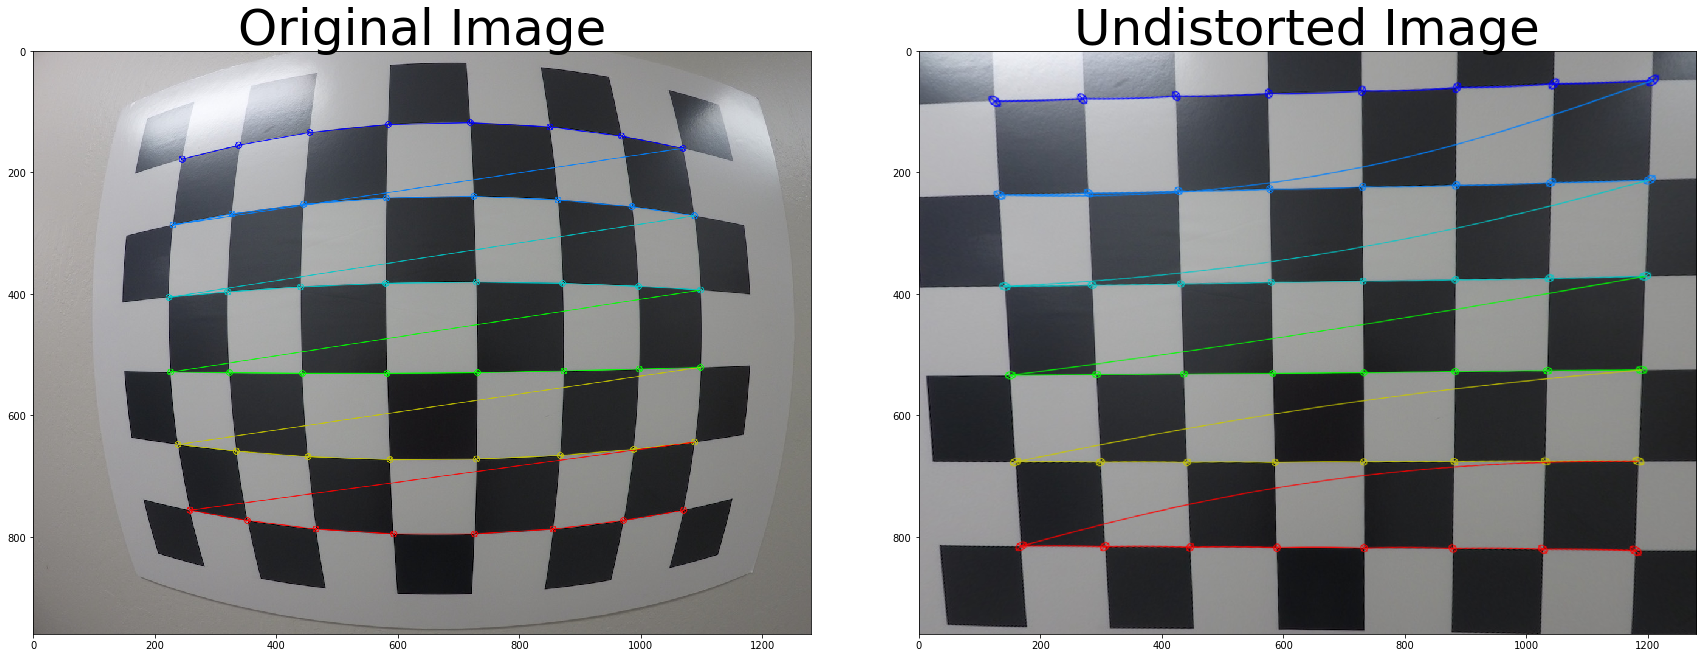

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)